# Análisis del parque de vehículos en Barcelona (2023)

En este trabajo se analiza el parque total de vehículos en la ciudad de
Barcelona durante el año 2023.

El objetivo del análisis es estudiar cómo se distribuyen los vehículos
por distritos y barrios, e identificar qué zonas concentran un mayor
número de vehículos.

Los datos utilizados provienen de una fuente oficial de Open Data BCN.

Dataset:
2023_parc_vehicles_evo_total.csv

Fuente:
https://opendata-ajuntament.barcelona.cat/data/es/dataset/transitaeri_flightradar_ppal_pais/resource/daaf92f4-8879-40f0-bc35-d550f1f9582a




In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('2023_parc_vehicles_evo_total.csv')
df.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Total
0,2023,01,Ciutat Vella,01,el Raval,001,1047
1,2023,01,Ciutat Vella,01,el Raval,002,424
2,2023,01,Ciutat Vella,01,el Raval,003,784
3,2023,01,Ciutat Vella,01,el Raval,004,810
4,2023,01,Ciutat Vella,01,el Raval,005,665


Barrios con menos de mil registros nuevos

In [29]:
df_filtrado = df.query("Total < 1000")
df_filtrado

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Total
1,2023,01,Ciutat Vella,01,el Raval,002,424
2,2023,01,Ciutat Vella,01,el Raval,003,784
3,2023,01,Ciutat Vella,01,el Raval,004,810
4,2023,01,Ciutat Vella,01,el Raval,005,665
5,2023,01,Ciutat Vella,01,el Raval,006,435
...,...,...,...,...,...,...,...
1067,2023,10,Sant Martí,73,la Verneda i la Pau,140,597
1068,2023,10,Sant Martí,73,la Verneda i la Pau,141,453
1069,2023,10,Sant Martí,73,la Verneda i la Pau,142,607
1070,2023,10,Sant Martí,73,la Verneda i la Pau,143,766


In [30]:
vehicles_per_districte = (
    df
    .groupby("Nom_Districte")["Total"]
    .sum()
    .sort_values(ascending=False)
)

vehicles_per_districte

Nom_Districte
Eixample              135225
Sant Martí            111587
Sarrià-St. Gervasi    104766
Sants-Montjuïc         90710
Horta-Guinardó         83258
Nou Barris             70758
Sant Andreu            68777
Gràcia                 58744
Les Corts              50371
Ciutat Vella           41753
No consta                 26
Name: Total, dtype: int64

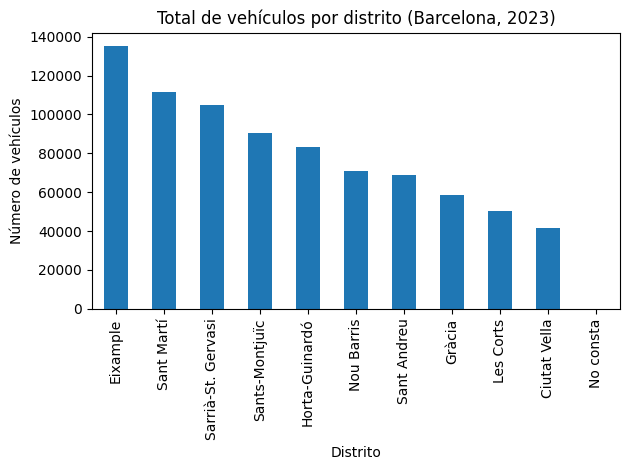

In [31]:
vehicles_per_districte.plot(kind="bar")

plt.title("Total de vehículos por distrito (Barcelona, 2023)")
plt.xlabel("Distrito")
plt.ylabel("Número de vehículos")
plt.tight_layout()
plt.show()

In [32]:
vehicles_per_barri = (
    df.groupby("Nom_Barri")["Total"]
    .sum()
    .sort_values(ascending=False)
)

vehicles_per_barri.head(10)

Nom_Barri
Sant Gervasi - Galvany             36301
la Dreta de l'Eixample             29952
la Nova Esquerra de l'Eixample     29122
les Corts                          27728
Sant Andreu                        26668
l'Antiga Esquerra de l'Eixample    23447
la Sagrada Família                 22444
la Vila de Gràcia                  22017
Sant Gervasi - la Bonanova         18250
el Putxet i el Farró               17414
Name: Total, dtype: int64

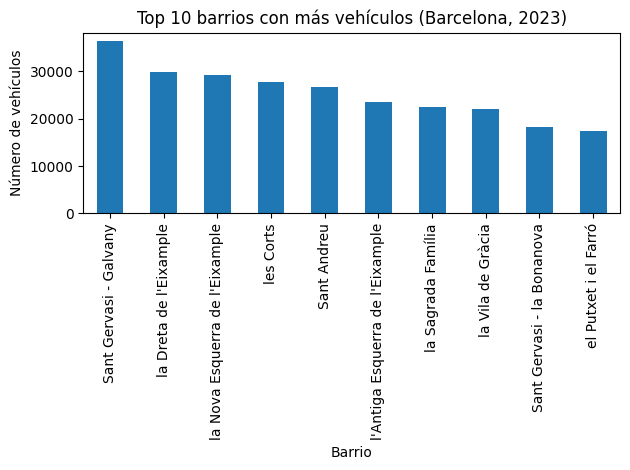

In [33]:
vehicles_per_barri.head(10).plot(kind="bar")

plt.title("Top 10 barrios con más vehículos (Barcelona, 2023)")
plt.xlabel("Barrio")
plt.ylabel("Número de vehículos")
plt.tight_layout()
plt.show()

## Conclusiones

Como se puede observar en los resultados, los distritos más adinerados de la
ciudad presentan un pico elevado en el número de vehículos, algo que era
esperable. En estas zonas, el mayor poder adquisitivo facilita la posesión
de uno o más vehículos por hogar.

Por otro lado, distritos como Horta-Guinardó, Sant Andreu, Sants-Montjuïc y
Nou Barris también presentan una gran cantidad total de vehículos. Esto se
explica principalmente por su alta densidad de población y por el hecho de
que son distritos extensos, con muchos barrios residenciales.

Además, en estas zonas el uso del vehículo privado suele ser más habitual,
ya sea por desplazamientos largos, menor accesibilidad al transporte público
en algunas áreas o por necesidades laborales.

En conjunto, los datos muestran que el número de vehículos depende tanto del
nivel económico como de factores demográficos y urbanísticos, como la
población, la extensión del distrito y la movilidad diaria de sus habitantes.